In [1]:
class SGD():
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
optimizer = SGD()

In [3]:
import numpy as np

class Momentum():
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.key():
            self.v[key] = self.momentum * self.v[key] - self.grads[key]
            params[key] += self.v[key]

In [4]:
class AdaGrad():
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like[val]
                
        for key in params.key():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
            

In [5]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


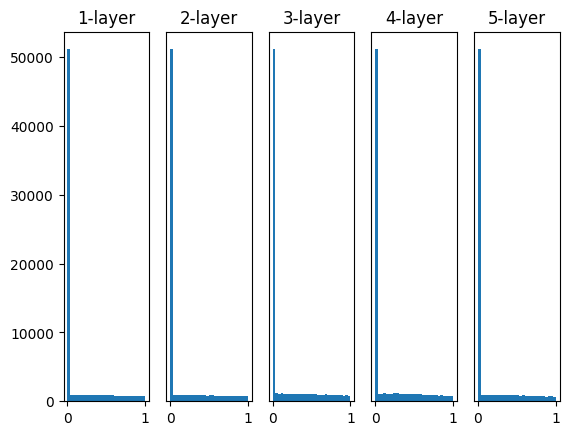

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

epoch # 0 train_acc : 0.08333333333333333 test_acc 0.0755
epoch # 1 train_acc : 0.10666666666666667 test_acc 0.0796
epoch # 2 train_acc : 0.11666666666666667 test_acc 0.0852
epoch # 3 train_acc : 0.13 test_acc 0.0914
epoch # 4 train_acc : 0.14 test_acc 0.0957
epoch # 5 train_acc : 0.16333333333333333 test_acc 0.1049
epoch # 6 train_acc : 0.18 test_acc 0.1141
epoch # 7 train_acc : 0.19 test_acc 0.1203
epoch # 8 train_acc : 0.19666666666666666 test_acc 0.1284
epoch # 9 train_acc : 0.20333333333333334 test_acc 0.1376
epoch # 10 train_acc : 0.22 test_acc 0.1445
epoch # 11 train_acc : 0.21666666666666667 test_acc 0.1442
epoch # 12 train_acc : 0.26 test_acc 0.1571
epoch # 13 train_acc : 0.27666666666666667 test_acc 0.1664
epoch # 14 train_acc : 0.29 test_acc 0.1788
epoch # 15 train_acc : 0.30333333333333334 test_acc 0.1883
epoch # 16 train_acc : 0.3233333333333333 test_acc 0.2014
epoch # 17 train_acc : 0.34 test_acc 0.2097
epoch # 18 train_acc : 0.37333333333333335 test_acc 0.223
epoch # 19 

epoch # 151 train_acc : 1.0 test_acc 0.7571
epoch # 152 train_acc : 0.9966666666666667 test_acc 0.7584
epoch # 153 train_acc : 1.0 test_acc 0.7581
epoch # 154 train_acc : 0.9966666666666667 test_acc 0.7599
epoch # 155 train_acc : 0.9966666666666667 test_acc 0.758
epoch # 156 train_acc : 0.9966666666666667 test_acc 0.7615
epoch # 157 train_acc : 0.9966666666666667 test_acc 0.7588
epoch # 158 train_acc : 1.0 test_acc 0.7587
epoch # 159 train_acc : 1.0 test_acc 0.7617
epoch # 160 train_acc : 1.0 test_acc 0.7619
epoch # 161 train_acc : 1.0 test_acc 0.7623
epoch # 162 train_acc : 1.0 test_acc 0.7604
epoch # 163 train_acc : 1.0 test_acc 0.7545
epoch # 164 train_acc : 1.0 test_acc 0.7608
epoch # 165 train_acc : 1.0 test_acc 0.7597
epoch # 166 train_acc : 1.0 test_acc 0.7596
epoch # 167 train_acc : 1.0 test_acc 0.7621
epoch # 168 train_acc : 1.0 test_acc 0.763
epoch # 169 train_acc : 1.0 test_acc 0.7629
epoch # 170 train_acc : 1.0 test_acc 0.7599
epoch # 171 train_acc : 1.0 test_acc 0.7606
epo

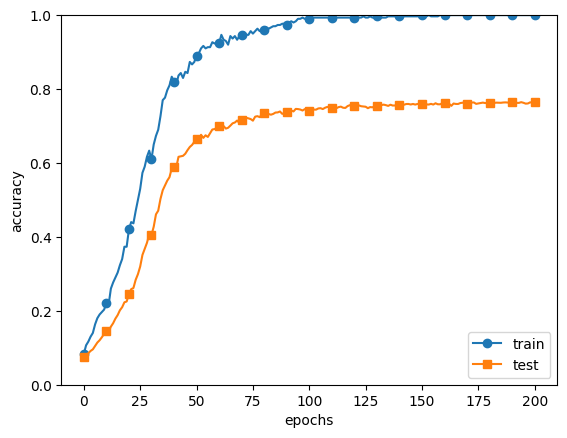

In [14]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#학습 데이터 수 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                       output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer=SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)
epoch_cnt=0

for i in range(10000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print('epoch #', str(epoch_cnt), 'train_acc :', str(train_acc),
             'test_acc', str(test_acc))
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch # 0 train_acc : 0.13 test_acc 0.1308
epoch # 1 train_acc : 0.31333333333333335 test_acc 0.2834
epoch # 2 train_acc : 0.6666666666666666 test_acc 0.5534
epoch # 3 train_acc : 0.7633333333333333 test_acc 0.5717
epoch # 4 train_acc : 0.79 test_acc 0.6157
epoch # 5 train_acc : 0.8966666666666666 test_acc 0.6839
epoch # 6 train_acc : 0.9366666666666666 test_acc 0.7326
epoch # 7 train_acc : 0.94 test_acc 0.7191
epoch # 8 train_acc : 0.9766666666666667 test_acc 0.7496
epoch # 9 train_acc : 0.97 test_acc 0.7265
epoch # 10 train_acc : 0.97 test_acc 0.7658
epoch # 11 train_acc : 0.9933333333333333 test_acc 0.7732
epoch # 12 train_acc : 0.98 test_acc 0.7485
epoch # 13 train_acc : 0.9733333333333334 test_acc 0.7573
epoch # 14 train_acc : 0.97 test_acc 0.7637
epoch # 15 train_acc : 0.9933333333333333 test_acc 0.7806
epoch # 16 train_acc : 0.9533333333333334 test_acc 0.7239
epoch # 17 train_acc : 0.9766666666666667 test_acc 0.7739
epoch # 18 train_acc : 0.9366666666666666 test_acc 0.698
epoch 

epoch # 182 train_acc : 1.0 test_acc 0.77
epoch # 183 train_acc : 1.0 test_acc 0.7699
epoch # 184 train_acc : 1.0 test_acc 0.7699
epoch # 185 train_acc : 1.0 test_acc 0.7699
epoch # 186 train_acc : 1.0 test_acc 0.77
epoch # 187 train_acc : 1.0 test_acc 0.77
epoch # 188 train_acc : 1.0 test_acc 0.77
epoch # 189 train_acc : 1.0 test_acc 0.77
epoch # 190 train_acc : 1.0 test_acc 0.77
epoch # 191 train_acc : 1.0 test_acc 0.7701
epoch # 192 train_acc : 1.0 test_acc 0.7701
epoch # 193 train_acc : 1.0 test_acc 0.7701
epoch # 194 train_acc : 1.0 test_acc 0.7702
epoch # 195 train_acc : 1.0 test_acc 0.7703
epoch # 196 train_acc : 1.0 test_acc 0.7704
epoch # 197 train_acc : 1.0 test_acc 0.7704
epoch # 198 train_acc : 1.0 test_acc 0.7704
epoch # 199 train_acc : 1.0 test_acc 0.7704
epoch # 200 train_acc : 1.0 test_acc 0.7704


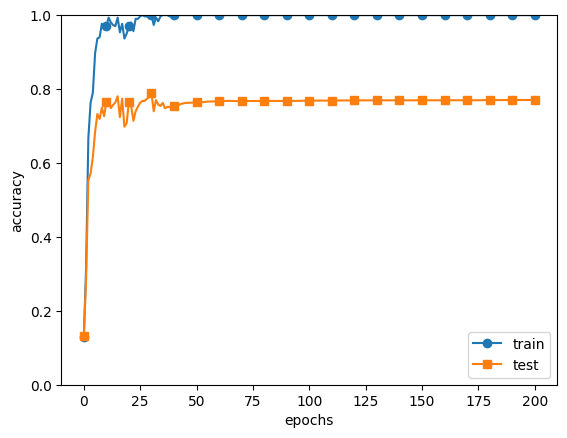

In [15]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#학습 데이터 수 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                       output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer=Adam(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)
epoch_cnt=0

for i in range(10000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print('epoch #', str(epoch_cnt), 'train_acc :', str(train_acc),
             'test_acc', str(test_acc))
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch # 0 train_acc : 0.11 test_acc 0.0906
epoch # 1 train_acc : 0.11 test_acc 0.0879
epoch # 2 train_acc : 0.11 test_acc 0.0877
epoch # 3 train_acc : 0.12666666666666668 test_acc 0.0893
epoch # 4 train_acc : 0.14333333333333334 test_acc 0.0937
epoch # 5 train_acc : 0.16333333333333333 test_acc 0.1007
epoch # 6 train_acc : 0.17 test_acc 0.1067
epoch # 7 train_acc : 0.19666666666666666 test_acc 0.1126
epoch # 8 train_acc : 0.21666666666666667 test_acc 0.1222
epoch # 9 train_acc : 0.23 test_acc 0.1299
epoch # 10 train_acc : 0.23333333333333334 test_acc 0.135
epoch # 11 train_acc : 0.27 test_acc 0.1461
epoch # 12 train_acc : 0.2833333333333333 test_acc 0.154
epoch # 13 train_acc : 0.2866666666666667 test_acc 0.1622
epoch # 14 train_acc : 0.29 test_acc 0.1686
epoch # 15 train_acc : 0.3 test_acc 0.1786
epoch # 16 train_acc : 0.3 test_acc 0.1891
epoch # 17 train_acc : 0.30666666666666664 test_acc 0.1985
epoch # 18 train_acc : 0.34 test_acc 0.2181
epoch # 19 train_acc : 0.37333333333333335 te

epoch # 155 train_acc : 0.9133333333333333 test_acc 0.7038
epoch # 156 train_acc : 0.8966666666666666 test_acc 0.6962
epoch # 157 train_acc : 0.8966666666666666 test_acc 0.6969
epoch # 158 train_acc : 0.92 test_acc 0.7106
epoch # 159 train_acc : 0.92 test_acc 0.7113
epoch # 160 train_acc : 0.9133333333333333 test_acc 0.7064
epoch # 161 train_acc : 0.9033333333333333 test_acc 0.7034
epoch # 162 train_acc : 0.9033333333333333 test_acc 0.7032
epoch # 163 train_acc : 0.8666666666666667 test_acc 0.6805
epoch # 164 train_acc : 0.9033333333333333 test_acc 0.6992
epoch # 165 train_acc : 0.89 test_acc 0.694
epoch # 166 train_acc : 0.88 test_acc 0.6864
epoch # 167 train_acc : 0.91 test_acc 0.6972
epoch # 168 train_acc : 0.9 test_acc 0.6976
epoch # 169 train_acc : 0.9166666666666666 test_acc 0.7064
epoch # 170 train_acc : 0.9066666666666666 test_acc 0.7031
epoch # 171 train_acc : 0.9066666666666666 test_acc 0.7055
epoch # 172 train_acc : 0.9166666666666666 test_acc 0.709
epoch # 173 train_acc : 0

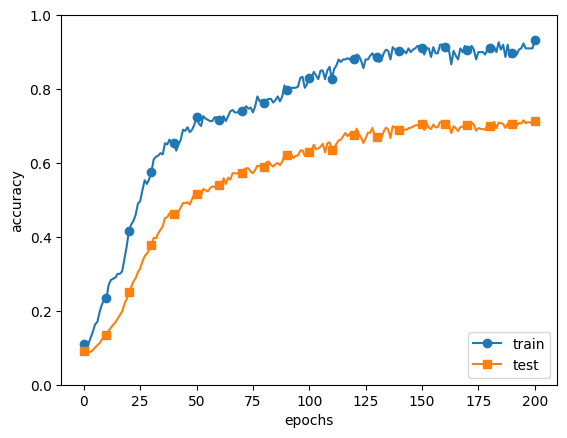

In [18]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#학습 데이터 수 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                       output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer=SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)
epoch_cnt=0

for i in range(10000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print('epoch #', str(epoch_cnt), 'train_acc :', str(train_acc),
             'test_acc', str(test_acc))
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [34]:
class Dropout():
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio= dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0-self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

train loss:2.334258192019682
=== epoch:1, train acc:0.12333333333333334, test acc:0.1154 ===
train loss:2.3089946066204257
train loss:2.2966439311871976
train loss:2.3148526086595242
=== epoch:2, train acc:0.12, test acc:0.1156 ===
train loss:2.3050043195630705
train loss:2.3050303075160956
train loss:2.301992575128002
=== epoch:3, train acc:0.13, test acc:0.1179 ===
train loss:2.3086842782465133
train loss:2.3069966017746113
train loss:2.3043379284395074
=== epoch:4, train acc:0.12666666666666668, test acc:0.1193 ===
train loss:2.3059533590076216
train loss:2.3165666797608937
train loss:2.3097390502264847
=== epoch:5, train acc:0.12666666666666668, test acc:0.1187 ===
train loss:2.3031837671302045
train loss:2.298175256791111
train loss:2.3105453706992636
=== epoch:6, train acc:0.13, test acc:0.1205 ===
train loss:2.3130686740029427
train loss:2.3089550120473623
train loss:2.3100037104272038
=== epoch:7, train acc:0.12333333333333334, test acc:0.1204 ===
train loss:2.294139938571191
t

=== epoch:57, train acc:0.18666666666666668, test acc:0.1673 ===
train loss:2.265257967825467
train loss:2.2413592173903933
train loss:2.2537726437407173
=== epoch:58, train acc:0.19333333333333333, test acc:0.1712 ===
train loss:2.2543685005846164
train loss:2.2497240211381087
train loss:2.2504450513198937
=== epoch:59, train acc:0.19333333333333333, test acc:0.173 ===
train loss:2.2361311402182027
train loss:2.2637645847121544
train loss:2.2329258617456573
=== epoch:60, train acc:0.19666666666666666, test acc:0.1738 ===
train loss:2.2400302811774986
train loss:2.2374163371816143
train loss:2.219985075458297
=== epoch:61, train acc:0.2, test acc:0.1748 ===
train loss:2.2228610759045586
train loss:2.234378857130131
train loss:2.2185816905509865
=== epoch:62, train acc:0.19333333333333333, test acc:0.1705 ===
train loss:2.220906834267812
train loss:2.255251507334903
train loss:2.227582168423102
=== epoch:63, train acc:0.19333333333333333, test acc:0.1698 ===
train loss:2.236373876219057

=== epoch:113, train acc:0.3433333333333333, test acc:0.2669 ===
train loss:2.0640939687498356
train loss:2.119149051450966
train loss:2.1114715158267874
=== epoch:114, train acc:0.3433333333333333, test acc:0.2663 ===
train loss:2.1114333311900815
train loss:2.0995506633786762
train loss:2.113427091614071
=== epoch:115, train acc:0.3466666666666667, test acc:0.2704 ===
train loss:2.1019044779133
train loss:2.082438548899687
train loss:2.137646469926322
=== epoch:116, train acc:0.35, test acc:0.2738 ===
train loss:2.139378276377216
train loss:2.082141503311875
train loss:2.120830787088653
=== epoch:117, train acc:0.35, test acc:0.2741 ===
train loss:2.093942892062554
train loss:2.117834131213024
train loss:2.1125887262656105
=== epoch:118, train acc:0.35, test acc:0.277 ===
train loss:2.059346576509084
train loss:2.10490757431969
train loss:2.0788031098222186
=== epoch:119, train acc:0.35333333333333333, test acc:0.2791 ===
train loss:2.1123060581804065
train loss:2.0998396274791773
tr

=== epoch:169, train acc:0.48, test acc:0.3707 ===
train loss:1.9532372243986902
train loss:1.7521108933107543
train loss:1.7826038006835383
=== epoch:170, train acc:0.48333333333333334, test acc:0.3731 ===
train loss:1.7948492177818318
train loss:1.82720487814456
train loss:1.7838123706330202
=== epoch:171, train acc:0.48, test acc:0.3737 ===
train loss:1.861294505641036
train loss:1.7975293176121512
train loss:1.8793049770641292
=== epoch:172, train acc:0.48, test acc:0.3767 ===
train loss:1.7847301353664387
train loss:1.7748837845593899
train loss:1.6782907513100305
=== epoch:173, train acc:0.47, test acc:0.3756 ===
train loss:1.7169100555343957
train loss:1.7668624381616578
train loss:1.7537768985727797
=== epoch:174, train acc:0.4766666666666667, test acc:0.376 ===
train loss:1.6933307908432722
train loss:1.7284791356161184
train loss:1.7036449498391668
=== epoch:175, train acc:0.4766666666666667, test acc:0.3788 ===
train loss:1.7255045519923198
train loss:1.7531008344011159
trai

=== epoch:224, train acc:0.6066666666666667, test acc:0.4689 ===
train loss:1.5409234735861326
train loss:1.434415309282597
train loss:1.3765932979295084
=== epoch:225, train acc:0.6, test acc:0.4703 ===
train loss:1.551110727709744
train loss:1.4923374264803497
train loss:1.3810659617233774
=== epoch:226, train acc:0.61, test acc:0.4739 ===
train loss:1.311100698520554
train loss:1.5146020860233171
train loss:1.5043255231606603
=== epoch:227, train acc:0.61, test acc:0.4756 ===
train loss:1.4937076577476482
train loss:1.4078453924489573
train loss:1.4822514108302505
=== epoch:228, train acc:0.6133333333333333, test acc:0.4797 ===
train loss:1.5045714532613912
train loss:1.443891966642374
train loss:1.4741932437515681
=== epoch:229, train acc:0.6133333333333333, test acc:0.481 ===
train loss:1.480243922030616
train loss:1.3389223021018808
train loss:1.5325019576455017
=== epoch:230, train acc:0.6133333333333333, test acc:0.4846 ===
train loss:1.328643943340022
train loss:1.361982584226

=== epoch:280, train acc:0.7033333333333334, test acc:0.5715 ===
train loss:1.0717405834019504
train loss:1.1711186887104794
train loss:1.1885995308995974
=== epoch:281, train acc:0.71, test acc:0.5697 ===
train loss:1.1846286287630121
train loss:1.1925784804102144
train loss:1.2255310703189801
=== epoch:282, train acc:0.7133333333333334, test acc:0.5653 ===
train loss:1.1590075796985235
train loss:1.1653549117862294
train loss:1.1723276289637443
=== epoch:283, train acc:0.7033333333333334, test acc:0.5682 ===
train loss:1.1448497841781702
train loss:1.1060847932798008
train loss:1.1283199372994688
=== epoch:284, train acc:0.7133333333333334, test acc:0.5718 ===
train loss:1.2158903851551661
train loss:1.0760348778367996
train loss:1.0614294002307245
=== epoch:285, train acc:0.7133333333333334, test acc:0.5729 ===
train loss:1.1058856617816195
train loss:1.0574585333662914
train loss:1.17861677896715
=== epoch:286, train acc:0.7066666666666667, test acc:0.5692 ===
train loss:1.11306120

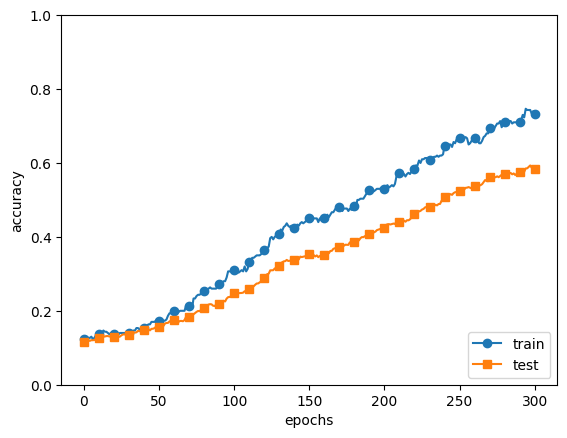

In [36]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


train loss:2.3664614762065024
=== epoch:1, train acc:0.09666666666666666, test acc:0.1099 ===
train loss:2.3866501811098124
train loss:2.3678316219269475
train loss:2.320182738674928
=== epoch:2, train acc:0.10666666666666667, test acc:0.1272 ===
train loss:2.278427832695493
train loss:2.263872818499172
train loss:2.340357629721207
=== epoch:3, train acc:0.16, test acc:0.1521 ===
train loss:2.301654259569673
train loss:2.2944815549324473
train loss:2.2281066656101207
=== epoch:4, train acc:0.19, test acc:0.1703 ===
train loss:2.2370660800432223
train loss:2.236959862457107
train loss:2.2550459339781668
=== epoch:5, train acc:0.22333333333333333, test acc:0.1897 ===
train loss:2.278123557934882
train loss:2.242456373724311
train loss:2.2310296559788925
=== epoch:6, train acc:0.25, test acc:0.2071 ===
train loss:2.265775934497643
train loss:2.2048008559972447
train loss:2.185862963583759
=== epoch:7, train acc:0.3, test acc:0.2219 ===
train loss:2.209644386848371
train loss:2.23207064273

=== epoch:57, train acc:0.91, test acc:0.7001 ===
train loss:0.48163400625955743
train loss:0.3520188905772414
train loss:0.48520750179127164
=== epoch:58, train acc:0.9066666666666666, test acc:0.7038 ===
train loss:0.386041875522178
train loss:0.4357724597998963
train loss:0.43664339970052396
=== epoch:59, train acc:0.9166666666666666, test acc:0.708 ===
train loss:0.38663371111114647
train loss:0.4373207350471444
train loss:0.4017659308038394
=== epoch:60, train acc:0.9133333333333333, test acc:0.7042 ===
train loss:0.36007713134599534
train loss:0.4239719672864462
train loss:0.4494686860827784
=== epoch:61, train acc:0.91, test acc:0.6981 ===
train loss:0.39143018932500423
train loss:0.38247700338934165
train loss:0.3717787847570376
=== epoch:62, train acc:0.9233333333333333, test acc:0.7095 ===
train loss:0.32171151447370916
train loss:0.3756911803656788
train loss:0.40063790936132393
=== epoch:63, train acc:0.9266666666666666, test acc:0.7111 ===
train loss:0.34239916759658456
tr

=== epoch:111, train acc:1.0, test acc:0.7527 ===
train loss:0.09576870338743128
train loss:0.060374838860560914
train loss:0.10008031440314875
=== epoch:112, train acc:1.0, test acc:0.7503 ===
train loss:0.08875921307688492
train loss:0.07163699074523142
train loss:0.09234576182567439
=== epoch:113, train acc:1.0, test acc:0.7443 ===
train loss:0.09308589214519357
train loss:0.10067831329509992
train loss:0.10856550347690261
=== epoch:114, train acc:1.0, test acc:0.7532 ===
train loss:0.07236049676191335
train loss:0.0847966186480531
train loss:0.09207500820442444
=== epoch:115, train acc:1.0, test acc:0.7502 ===
train loss:0.09366326561587414
train loss:0.0694002580352403
train loss:0.06710784291759933
=== epoch:116, train acc:1.0, test acc:0.7506 ===
train loss:0.07436602753392257
train loss:0.047005387085180664
train loss:0.07221920729327048
=== epoch:117, train acc:1.0, test acc:0.7541 ===
train loss:0.06448673390268063
train loss:0.06873582505948708
train loss:0.05662264980312537

=== epoch:169, train acc:1.0, test acc:0.7601 ===
train loss:0.03595976264615172
train loss:0.03513045702024819
train loss:0.02140586125630474
=== epoch:170, train acc:1.0, test acc:0.7633 ===
train loss:0.02822470932282951
train loss:0.023582796785483168
train loss:0.03531218004420689
=== epoch:171, train acc:1.0, test acc:0.7634 ===
train loss:0.027611217001422043
train loss:0.025071750482767715
train loss:0.03205888710712126
=== epoch:172, train acc:1.0, test acc:0.7639 ===
train loss:0.020875212411254042
train loss:0.030282098760073137
train loss:0.02688884685467493
=== epoch:173, train acc:1.0, test acc:0.7644 ===
train loss:0.03494403902554724
train loss:0.02826972308335741
train loss:0.022971108704513698
=== epoch:174, train acc:1.0, test acc:0.762 ===
train loss:0.028559766977651148
train loss:0.025806815659985237
train loss:0.024546549425278986
=== epoch:175, train acc:1.0, test acc:0.763 ===
train loss:0.0313400076146181
train loss:0.0326147547599469
train loss:0.027922058165

=== epoch:226, train acc:1.0, test acc:0.7692 ===
train loss:0.012358601591831527
train loss:0.016494541052580528
train loss:0.013574601895695782
=== epoch:227, train acc:1.0, test acc:0.7699 ===
train loss:0.020605435866455437
train loss:0.011533796217149159
train loss:0.01563329465784563
=== epoch:228, train acc:1.0, test acc:0.7678 ===
train loss:0.013002187426050273
train loss:0.015015549976856701
train loss:0.014147181800353695
=== epoch:229, train acc:1.0, test acc:0.7674 ===
train loss:0.017254991162874957
train loss:0.010679050209383988
train loss:0.01553288392301458
=== epoch:230, train acc:1.0, test acc:0.7668 ===
train loss:0.015429710047505455
train loss:0.01862808894463033
train loss:0.011599862303591214
=== epoch:231, train acc:1.0, test acc:0.7653 ===
train loss:0.013674676021937364
train loss:0.014678217883248272
train loss:0.016733402689275822
=== epoch:232, train acc:1.0, test acc:0.769 ===
train loss:0.013785097703417237
train loss:0.014449427209254686
train loss:0.0

=== epoch:283, train acc:1.0, test acc:0.7715 ===
train loss:0.010514229382722657
train loss:0.008111188661438446
train loss:0.012631000457050304
=== epoch:284, train acc:1.0, test acc:0.7707 ===
train loss:0.009113559273289594
train loss:0.011389379616888193
train loss:0.008599774748058698
=== epoch:285, train acc:1.0, test acc:0.7711 ===
train loss:0.007512339203403564
train loss:0.008197805861138222
train loss:0.007691956380652239
=== epoch:286, train acc:1.0, test acc:0.7705 ===
train loss:0.009970662892985963
train loss:0.010010271168756808
train loss:0.009871619340152241
=== epoch:287, train acc:1.0, test acc:0.7704 ===
train loss:0.011942413866253457
train loss:0.00906785948300944
train loss:0.009167178400344651
=== epoch:288, train acc:1.0, test acc:0.769 ===
train loss:0.010000324026997465
train loss:0.008424135163715353
train loss:0.008490364011354251
=== epoch:289, train acc:1.0, test acc:0.77 ===
train loss:0.011203774314040007
train loss:0.01066005000035201
train loss:0.01

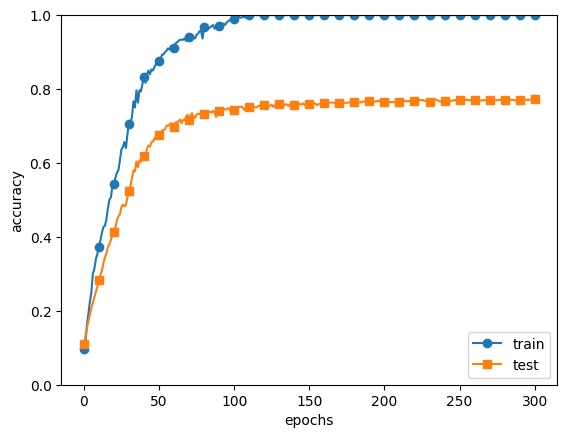

In [38]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


val acc:0.32 | lr:0.001121165685279455, weight decay:3.9417943095864007e-07
val acc:0.11 | lr:1.1448614273959695e-06, weight decay:9.465823997202568e-06
val acc:0.13 | lr:1.7376865722774807e-06, weight decay:7.409424478509071e-07
val acc:0.68 | lr:0.005575108539803312, weight decay:7.72915140756697e-07
val acc:0.11 | lr:4.573086356559268e-06, weight decay:8.647912578633153e-06
val acc:0.11 | lr:3.488854897609496e-05, weight decay:4.3317148158346166e-05
val acc:0.14 | lr:0.0004346464489358367, weight decay:5.774100512420745e-07
val acc:0.76 | lr:0.00871855167115023, weight decay:4.844444303007779e-05
val acc:0.37 | lr:0.002777094842505963, weight decay:1.9891335980443235e-05
val acc:0.1 | lr:5.304357501640381e-06, weight decay:9.235841334135453e-07
val acc:0.15 | lr:3.6372721177575696e-05, weight decay:1.094413214274136e-06
val acc:0.17 | lr:0.0005933315313737731, weight decay:1.747503782998187e-06
val acc:0.19 | lr:0.0016133852542138047, weight decay:3.4426943294227694e-05
val acc:0.76

Best-20(val acc:0.37) | lr:0.002777094842505963, weight decay:1.9891335980443235e-05


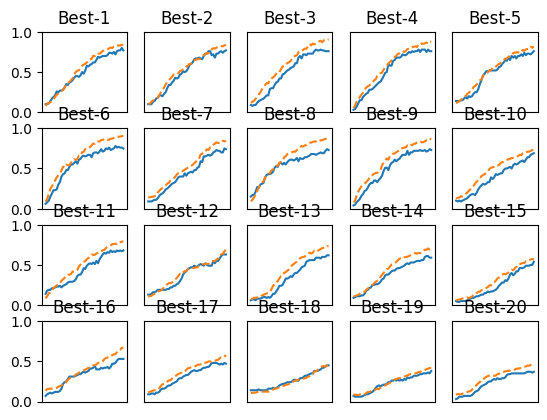

In [39]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
